In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In [2]:
transactions = pd.read_csv(r'C:\Users\KIIT\Desktop\european creditcard dataset.csv')

In [3]:
transactions.shape

(284807, 31)

In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
transactions.isnull().any().any()

False

In [6]:
transactions['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
transactions['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [8]:
X = transactions.drop(labels='Class', axis=1) # Features
y = transactions.loc[:,'Class']#response

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [11]:
X_train.shape

(199364, 30)

In [12]:
X_test.shape

(85443, 30)

In [13]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 30)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 30)
Number transactions y_test dataset:  (85443,)


In [14]:
from sklearn.feature_selection import SelectPercentile

In [15]:
select = SelectPercentile(percentile = 75)

In [16]:
select.fit(X_train,y_train)

SelectPercentile(percentile=75)

In [17]:
X_train_selected=select.transform(X_train)

In [18]:
X_test_selected=select.transform(X_test)

In [19]:
print('X_train.shape is :{}'.format(X_train.shape))

X_train.shape is :(199364, 30)


In [20]:
print('X_train_selected.shape is :{}'.format(X_train_selected.shape))

X_train_selected.shape is :(199364, 22)


In [21]:
pip install -U scikit-learn==0.24.1

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit-learn-0.24.1.tar.gz (7.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-learn
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [56 lines of output]
  <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Partial import of sklearn during the build process.
  <string>:116: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\ProgramData\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 351, in <module>
      main()
    File "C:\ProgramData\anacon

In [22]:
pip install -U scikit-learn==1.2.2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
!pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [24]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
sm = SMOTE(random_state = 2)

In [27]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [28]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))

After OverSampling, the shape of train_X: (398040, 30)


In [29]:
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_y: (398040,) 



In [30]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))

After OverSampling, counts of label '1': 199020


In [31]:
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '0': 199020


In [32]:
X_train_res.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000
mean,88790.317070,-2.226520,1.781307,-3.336121,2.190558,-1.470697,-0.673258,-2.631773,0.280798,-1.207356,-2.708099,1.817967,-3.022640,-0.046778,-3.387499,-0.057576,-1.979045,-3.166731,-1.049176,0.333862,0.151493,0.427656,-0.012462,-0.026217,-0.047478,0.016034,0.012370,0.077549,0.050524,101.280766
std,48058.232897,4.970988,3.374038,5.624185,2.990199,3.871855,1.681273,5.258629,4.654633,2.102671,4.138013,2.599228,4.382586,1.006780,4.327970,0.913290,3.288871,5.605073,2.253544,1.173806,1.015680,2.619148,1.090421,1.112166,0.536291,0.615951,0.444987,0.822250,0.382932,221.454385
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.431131,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.335193,-7.213527,-54.497720,-34.830382,-10.933144,-36.666000,-2.824849,-8.696627,-2.534330,-22.565679,-15.430084,0.000000
25%,47736.500000,-2.876302,-0.086095,-4.937187,-0.052488,-1.732393,-1.478039,-2.947722,-0.197999,-2.114077,-4.323101,-0.125220,-5.056790,-0.766797,-6.523239,-0.602917,-3.178378,-5.069887,-1.601822,-0.380831,-0.195381,-0.153114,-0.501291,-0.220348,-0.368776,-0.309051,-0.280373,-0.069761,-0.053539,4.240000
50%,81767.688963,-0.811792,1.000732,-1.481175,1.448676,-0.419602,-0.667527,-0.707201,0.167463,-0.750031,-1.032352,1.138214,-1.094313,-0.026718,-1.274288,-0.004453,-0.686009,-0.604145,-0.374727,0.212417,0.026202,0.166226,0.023203,-0.025920,-0.003054,0.043440,-0.029502,0.053767,0.038540,29.121666
75%,134840.346901,0.850778,2.775980,0.279995,4.147860,0.466590,0.047911,0.198008,0.858014,0.102397,-0.035396,3.306462,0.173368,0.602605,0.080350,0.588296,0.231765,0.173336,0.320872,0.959280,0.387742,0.656564,0.525294,0.198834,0.340914,0.371690,0.274145,0.392696,0.204337,99.990000
max,172792.000000,2.451888,22.057729,9.382558,16.715537,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.207059,5.041069,5.591971,39.420904,27.202839,10.503090,22.083545,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [33]:
from sklearn.preprocessing import MinMaxScaler


In [34]:

scaler = MinMaxScaler()

In [35]:
X_train_res= scaler.fit_transform(X_train_res)

In [36]:
X_train_res

array([[4.02952683e-01, 9.77626718e-01, 7.60253262e-01, ...,
        4.18105512e-01, 3.13220896e-01, 3.89238944e-05],
       [4.82423955e-01, 9.27995343e-01, 7.79064273e-01, ...,
        4.15719454e-01, 3.11923930e-01, 5.51668356e-03],
       [6.46575073e-01, 9.46732342e-01, 7.74426417e-01, ...,
        3.96497821e-01, 3.02741403e-01, 1.40865574e-03],
       ...,
       [8.56760121e-01, 9.61356326e-01, 8.04112457e-01, ...,
        4.28428180e-01, 3.21204878e-01, 3.29120460e-05],
       [3.45677908e-01, 8.22373631e-01, 7.18587847e-01, ...,
        4.17525860e-01, 2.93465937e-01, 1.20594304e-02],
       [4.45282867e-02, 9.46554003e-01, 8.06754463e-01, ...,
        4.26212408e-01, 3.19902644e-01, 3.89238944e-05]])

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
 lr= LogisticRegression()

In [39]:
lr.fit(X_train_res, y_train_res.ravel())

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
lr.fit(X_train_selected,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
predictions = lr.predict(X_test_selected)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test, predictions)

0.998735999438222

In [44]:
from sklearn.metrics import matthews_corrcoef

In [45]:
MCC=matthews_corrcoef(y_test,predictions)

In [46]:
print(" Matthews correlation coefficient is{}".format(MCC))

 Matthews correlation coefficient is0.6589231737099539


In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.62      0.70      0.66       148

    accuracy                           1.00     85443
   macro avg       0.81      0.85      0.83     85443
weighted avg       1.00      1.00      1.00     85443



In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test, predictions)

array([[85231,    64],
       [   44,   104]], dtype=int64)

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf=RandomForestClassifier(n_estimators=5)

In [53]:
rf.fit(X_train_res,y_train_res.ravel())

RandomForestClassifier(n_estimators=5)

In [54]:
rf.fit(X_train_selected,y_train)

RandomForestClassifier(n_estimators=5)

In [55]:
predictions=rf.predict(X_test_selected)

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.83      0.87       148

    accuracy                           1.00     85443
   macro avg       0.95      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test, predictions)

0.9995552590615966

In [60]:
from sklearn.metrics import matthews_corrcoef

In [61]:
MCC=matthews_corrcoef(y_test,predictions)

In [62]:
print(" Matthews correlation coefficient is{}".format(MCC))

 Matthews correlation coefficient is0.8667514940702886


In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(y_test, predictions)

array([[85282,    13],
       [   25,   123]], dtype=int64)

In [65]:
import sklearn.metrics as metrics

In [66]:
probs = rf.predict_proba(X_test_selected)

In [67]:
preds = probs[:,1]

In [68]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

In [69]:
roc_auc = metrics.auc(fpr, tpr)

In [70]:
import matplotlib.pyplot as plt

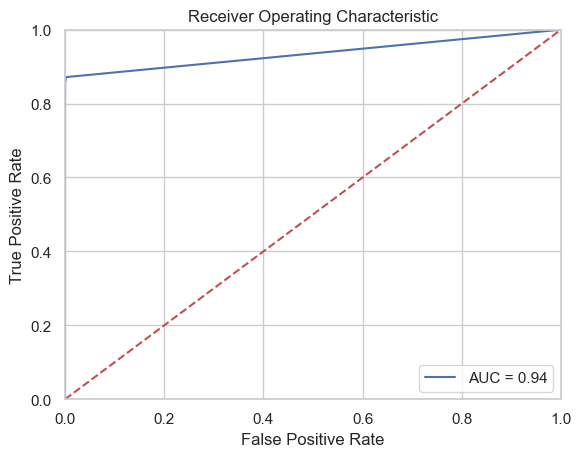

In [71]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
G_NB = GaussianNB()

In [74]:
G_NB.fit(X_train_res, y_train_res)

GaussianNB()

In [75]:
G_NB.fit(X_train_selected,y_train)

GaussianNB()

In [77]:
predictions=G_NB.predict(X_test_selected)

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

In [79]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.16      0.72      0.26       148

    accuracy                           0.99     85443
   macro avg       0.58      0.85      0.63     85443
weighted avg       1.00      0.99      1.00     85443



In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score(y_test, predictions)

0.9928841449855459

In [82]:
from sklearn.metrics import matthews_corrcoef

In [83]:
MCC=matthews_corrcoef(y_test,predictions)

In [84]:
print(" Matthews correlation coefficient is{}".format(MCC))

 Matthews correlation coefficient is0.3340303892577805


In [85]:
import sklearn.metrics as metrics

In [87]:
probs = G_NB.predict_proba(X_test_selected)

In [88]:
preds = probs[:,1]

In [89]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

In [90]:
roc_auc = metrics.auc(fpr, tpr)

In [91]:
import matplotlib.pyplot as plt

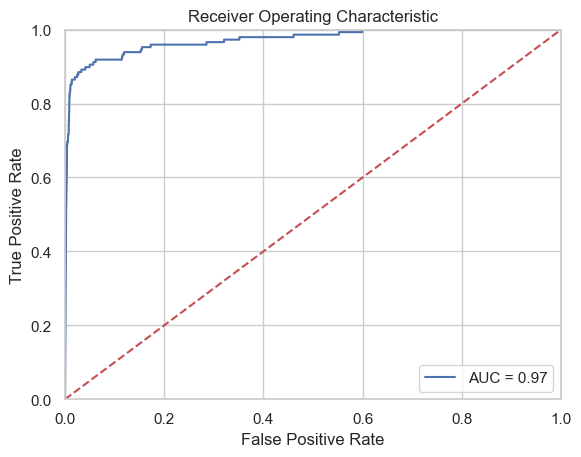

In [92]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [93]:
from sklearn.naive_bayes import BernoulliNB

In [94]:
BNB_Classifier2 = BernoulliNB()

In [95]:
BNB_Classifier2.fit(X_train_res, y_train_res.ravel())

BernoulliNB()

In [96]:
BNB_Classifier2.fit(X_train_selected,y_train)

BernoulliNB()

In [97]:
predictions = BNB_Classifier2.predict(X_test_selected)

In [98]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.66      0.75       148

    accuracy                           1.00     85443
   macro avg       0.93      0.83      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [99]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(y_test, predictions)

0.9992275552122467

In [101]:
from sklearn.metrics import matthews_corrcoef

In [102]:
MCC=matthews_corrcoef(y_test,predictions)

In [103]:
print(" Matthews correlation coefficient is{}".format(MCC))

 Matthews correlation coefficient is0.7541073993680298


In [104]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [105]:
from xgboost import XGBClassifier

In [106]:
model = XGBClassifier()

In [107]:
model.fit(X_train_res,y_train_res.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [108]:
model.fit(X_train_selected,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [109]:
predictions=model.predict(X_test_selected)

In [110]:
from sklearn.metrics import confusion_matrix, classification_report

In [111]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.83      0.88       148

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [112]:
from sklearn.metrics import accuracy_score

In [113]:
accuracy_score(y_test, predictions)

0.9996137776061234

In [114]:
from sklearn.metrics import matthews_corrcoef

In [116]:
MCC=matthews_corrcoef(y_test,predictions)

In [117]:
print(" Matthews correlation coefficient is{}".format(MCC))

 Matthews correlation coefficient is0.8831740821641247


In [118]:
import sklearn.metrics as metrics

In [119]:
probs = model.predict_proba(X_test_selected)

In [120]:
preds = probs[:,1]

In [121]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

In [122]:
roc_auc = metrics.auc(fpr, tpr)

In [123]:
import matplotlib.pyplot as plt

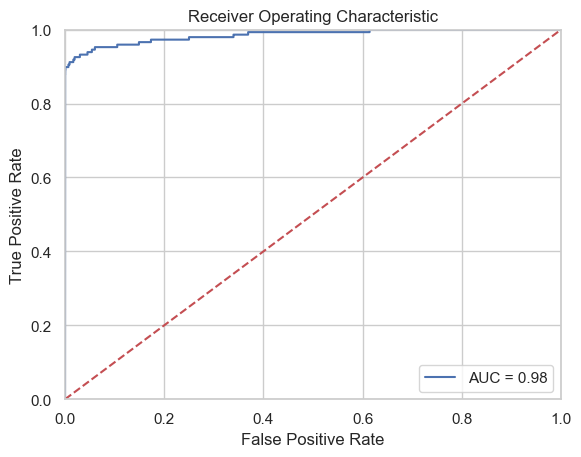

In [124]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()